<a href="https://colab.research.google.com/github/dipayandas97/EEG-Analysis/blob/master/CNN_autoencoder_on_EEG_spectral_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from google.colab import drive
drive.mount('/content/drive')
DATA_PATH = "/content/drive/My Drive/ISI/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
infile = open('/content/drive/My Drive/ISI/Dataframe.pkl','rb')
orig_data = pickle.load(infile)

labels = orig_data['labels']

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

lab_enc = LabelEncoder()
ohe = OneHotEncoder(sparse = False)
_y = lab_enc.fit_transform(labels)
Y_data = ohe.fit_transform(np.asarray(_y).reshape(397,1))
Y_data.shape
print(_y[0])
print(Y_data[0])

X_data = np.load(DATA_PATH+'spectrograms/'+'final_spectral_data.npy')
X_data.shape

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(397, 90, 200, 3)

In [0]:
print(X_train.shape,X_train[0].shape,X_train[0][0][0][2], X_train[0][1:2,3:5,0:2].shape)

In [0]:
X_data[0][0:80,0:200,0:3].shape

(80, 200, 3)

In [0]:
import cv2
new_X = []
for i in range(397):
  new_X.append(cv2.cvtColor(X_data[i][0:80], cv2.COLOR_BGR2GRAY))
new_X = np.asarray(new_X)
new_X.shape

(397, 80, 200)

(80, 200)

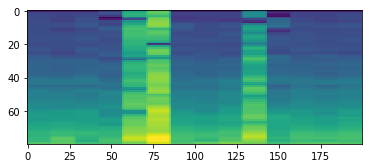

In [0]:
plt.imshow(new_X[0])
new_X[0].shape

In [0]:
X_resized = []
for i in range(397):
  X_resized.append(cv2.resize(new_X[i], (28,28)))

X_resized = np.asarray(X_resized)

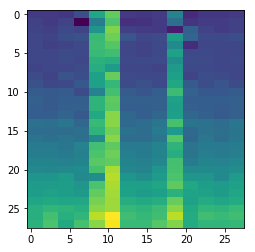

In [0]:
plt.imshow(X_resized[0])

In [0]:
X_resized.shape

(397, 28, 28)

In [0]:
Y_data.shape

(397, 10)

In [0]:
np.save(DATA_PATH+'X_data_28x28x1.npy',X_resized)

In [0]:
np.save

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resized, Y_data, test_size = 0.1)

In [0]:
X_train.shape

(357, 28, 28)

In [0]:
from keras.models import Model
from keras.layers import *

input_img = Input(shape=(28,28,1))

x = Conv2D(16, (3,3), activation = 'relu', padding = 'same')(input_img)
x = MaxPooling2D((2,2), padding = 'same')(x) #14
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x) #7
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x) #4
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x) #2

# at this point the representation is (2, 2, 8) i.e. 128-dimensional

x = Conv2D(8, (2, 2), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x) #4
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x) # 8

x = MaxPooling2D((2,2), strides = 1, padding = 'same')(x) # 7

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x) #14
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x) #28
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


In [0]:
encoder = Model(input_img, encoded)

In [0]:
autoencoder.summary()

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 4, 4, 8)           0  

In [0]:
encoder.summary()

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 4, 4, 8)           0  

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0],28,28,1))
X_test = np.reshape(X_test, (X_test.shape[0],28,28,1))
autoencoder.fit(X_train, X_train,
                epochs=1000,
                shuffle=True,
                batch_size = 32,
               validation_data=(X_test,X_test))

Train on 357 samples, validate on 40 samples
Epoch 1/1000
357/357 [==============================] - 0s 398us/step - loss: -1539.4109 - acc: 0.0000e+00 - val_loss: -1573.5582 - val_acc: 0.0000e+00
Epoch 2/1000
357/357 [==============================] - 0s 375us/step - loss: -1539.4109 - acc: 0.0000e+00 - val_loss: -1573.5582 - val_acc: 0.0000e+00
Epoch 3/1000
357/357 [==============================] - 0s 414us/step - loss: -1539.4110 - acc: 0.0000e+00 - val_loss: -1573.5582 - val_acc: 0.0000e+00
Epoch 4/1000
357/357 [==============================] - 0s 396us/step - loss: -1539.4109 - acc: 0.0000e+00 - val_loss: -1573.5582 - val_acc: 0.0000e+00
Epoch 5/1000
357/357 [==============================] - 0s 385us/step - loss: -1539.4109 - acc: 0.0000e+00 - val_loss: -1573.5582 - val_acc: 0.0000e+00
Epoch 6/1000
357/357 [==============================] - 0s 385us/step - loss: -1539.4109 - acc: 0.0000e+00 - val_loss: -1573.5582 - val_acc: 0.0000e+00
Epoch 7/1000
357/357 [=====================

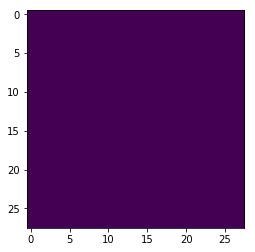

In [0]:
p = autoencoder.predict(X_resized[0].reshape(1,28,28,1))
plt.imshow(p.reshape(28,28))
plt.show()